<a href="https://colab.research.google.com/github/wendirad/weekTwo/blob/task_2/notebooks/task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('data.xlsx')
data.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
data['Start'] = pd.to_datetime(data['Start'])
data['End'] = pd.to_datetime(data['End'])
data['Day'] = data['Start'].dt.date

In [5]:
session_frequency = data.groupby(['MSISDN/Number', 'Day']).agg(
    session_count=('Bearer Id', 'count')  # Count sessions per user per day
).reset_index()


In [6]:
session_frequency.head()

,MSISDN/Number,Day,session_count
0,3.360100e+10,2019-04-25,1
1,3.360100e+10,2019-04-27,1
2,3.360100e+10,2019-04-28,1
3,3.360101e+10,2019-04-27,1
4,3.360101e+10,2019-04-24,2


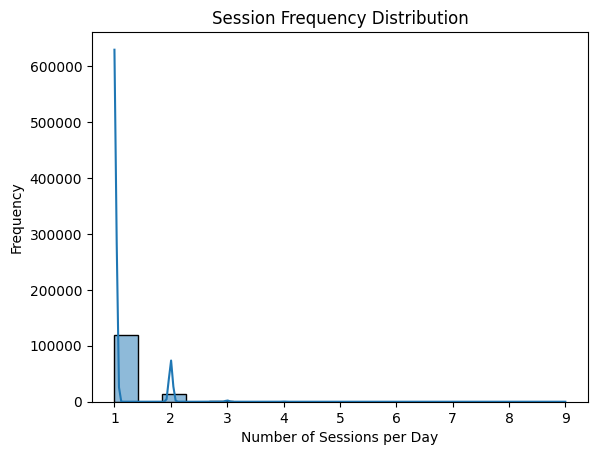

In [7]:
sns.histplot(session_frequency['session_count'], kde=True)
plt.title('Session Frequency Distribution')
plt.xlabel('Number of Sessions per Day')
plt.ylabel('Frequency')
plt.show()

In [9]:
data['Session_Duration'] = (data['End'] - data['Start']).dt.total_seconds()
data[['Bearer Id', 'Start', 'End', 'Session_Duration']].head()

,Bearer Id,Start,End,Session_Duration
0,13114483460844900352,2019-04-04 12:01:18,2019-04-25 14:35:31,1823653.0
1,13114483482878900224,2019-04-09 13:04:04,2019-04-25 08:15:48,1365104.0
2,13114483484080500736,2019-04-09 17:42:11,2019-04-25 11:58:13,1361762.0
3,13114483485442799616,2019-04-10 00:31:25,2019-04-25 07:36:35,1321510.0
4,13114483499480700928,2019-04-12 20:10:23,2019-04-25 10:40:32,1089009.0


In [11]:
user_session_duration = data.groupby('MSISDN/Number').agg(
    total_duration=('Session_Duration', 'sum'),
    average_duration=('Session_Duration', 'mean')
).reset_index()

user_session_duration.head()

,MSISDN/Number,total_duration,average_duration
0,3.360100e+10,116720.0,116720.0
1,3.360100e+10,181231.0,181231.0
2,3.360100e+10,134969.0,134969.0
3,3.360101e+10,49878.0,49878.0
4,3.360101e+10,37104.0,18552.0


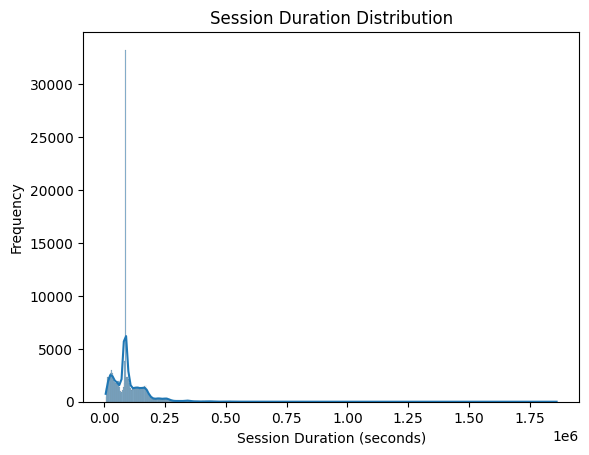

In [12]:
sns.histplot(data['Session_Duration'], kde=True)
plt.title('Session Duration Distribution')
plt.xlabel('Session Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [13]:
data['Total_Traffic_Bytes'] = data['Total DL (Bytes)'] + data['Total UL (Bytes)']
data[['Bearer Id', 'Total DL (Bytes)', 'Total UL (Bytes)', 'Total_Traffic_Bytes']].head()

,Bearer Id,Total DL (Bytes),Total UL (Bytes),Total_Traffic_Bytes
0,13114483460844900352,308879636.0,36749741.0,345629377.0
1,13114483482878900224,653384965.0,53800391.0,707185356.0
2,13114483484080500736,279807335.0,27883638.0,307690973.0
3,13114483485442799616,846028530.0,43324218.0,889352748.0
4,13114483499480700928,569138589.0,38542814.0,607681403.0


## **Top 10 customers per engagement metric**

In [14]:
customer_metrics = data.groupby('MSISDN/Number').agg(
    session_frequency=('Bearer Id', 'count'),
    total_duration_ms=('Dur. (ms)', 'sum'),
    total_download=('Total DL (Bytes)', 'sum'),
    total_upload=('Total UL (Bytes)', 'sum')
).reset_index()

In [15]:
customer_metrics['total_traffic'] = customer_metrics['total_download'] + customer_metrics['total_upload']

In [16]:
top_session_frequency = customer_metrics.nlargest(10, 'session_frequency')
top_total_duration = customer_metrics.nlargest(10, 'total_duration_ms')
top_total_traffic = customer_metrics.nlargest(10, 'total_traffic')

In [17]:
top_session_frequency,top_total_duration,top_total_traffic

(       MSISDN/Number  session_frequency  total_duration_ms  total_download  \
 13526   3.362632e+10                 18          8791927.0    7.301517e+09   
 6437    3.361489e+10                 17          9966898.0    8.156743e+09   
 13180   3.362578e+10                 17         18553754.0    7.770043e+09   
 37052   3.365973e+10                 16          4035428.0    7.081602e+09   
 76363   3.367588e+10                 15          4865947.0    7.309542e+09   
 92923   3.376054e+10                 15          9279434.0    7.811295e+09   
 65118   3.366716e+10                 13          8744914.0    5.052068e+09   
 666     3.360313e+10                 12          6287761.0    4.540607e+09   
 1279    3.360452e+10                 12          5207990.0    5.096079e+09   
 13994   3.362708e+10                 12          4703516.0    5.309479e+09   
 
        total_upload  total_traffic  
 13526   669650721.0   7.971167e+09  
 6437    689483001.0   8.846226e+09  
 13180   729577

## **k-means (k=3) to classify customers in three groups of engagement.**

In [18]:
scaler = MinMaxScaler()


In [19]:
normalized_metrics = scaler.fit_transform(
    customer_metrics[['session_frequency', 'total_duration_ms', 'total_traffic']]
)


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['engagement_cluster_norm'] = kmeans.fit_predict(normalized_metrics)

In [21]:
customer_metrics[['MSISDN/Number', 'session_frequency', 'total_duration_ms', 'total_traffic', 'engagement_cluster_norm']]


,MSISDN/Number,session_frequency,total_duration_ms,total_traffic,engagement_cluster_norm
0,3.360100e+10,1,116720.0,8.786906e+08,2
1,3.360100e+10,1,181230.0,1.568596e+08,2
2,3.360100e+10,1,134969.0,5.959665e+08,2
3,3.360101e+10,1,49878.0,4.223207e+08,2
4,3.360101e+10,2,37104.0,1.457411e+09,0
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08,2
106852,3.379000e+10,1,140988.0,4.803073e+08,2
106853,3.197021e+12,1,877385.0,2.321240e+08,2
106854,3.370000e+14,1,253030.0,5.962878e+08,2


In [22]:
centroids = kmeans.cluster_centers_
f"Cluster centroids: {centroids}"

'Cluster centroids: [[0.06915313 0.01112472 0.12386147]\n [0.19091316 0.03029614 0.25485257]\n [0.00247487 0.00538298 0.05244953]]'

**Key Insights**
- **Cluster 0 (Moderate Users):**

This group has the highest session frequency and traffic among the three clusters.
Likely consists of users moderately engaged with the service.
These users might require some incentives to increase engagement further.
- **Cluster 1 (Low Engagement Users):**

This cluster has the lowest engagement across all metrics.
Possible reasons include poor network quality, lack of interest, or users who use the service sparingly.
Strategies: Improve quality of service or target these users with marketing campaigns.
- **Cluster 2 (Traffic-Focused Users):**

While their session frequency and duration are low (similar to Cluster 1), their traffic is significantly higher.
These users might be engaging in fewer but more intensive sessions, such as downloading or streaming.


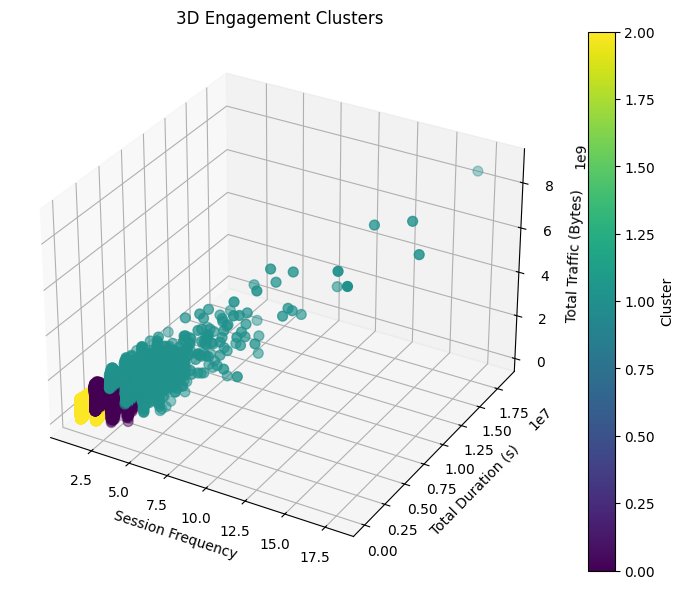

In [23]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    customer_metrics['session_frequency'],
    customer_metrics['total_duration_ms'],
    customer_metrics['total_traffic'],
    c=customer_metrics['engagement_cluster_norm'],
    cmap='viridis',
    s=50
)

ax.set_title("3D Engagement Clusters")
ax.set_xlabel("Session Frequency")
ax.set_ylabel("Total Duration (s)")
ax.set_zlabel("Total Traffic (Bytes)")
plt.colorbar(scatter, label='Cluster')
plt.show()

In [26]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_metrics['engagement_cluster'] = kmeans.fit_predict(customer_metrics[['session_frequency', 'total_duration_ms', 'total_traffic']])

In [27]:
customer_metrics[['MSISDN/Number', 'session_frequency', 'total_duration_ms', 'total_traffic', 'engagement_cluster']]

,MSISDN/Number,session_frequency,total_duration_ms,total_traffic,engagement_cluster
0,3.360100e+10,1,116720.0,8.786906e+08,1
1,3.360100e+10,1,181230.0,1.568596e+08,0
2,3.360100e+10,1,134969.0,5.959665e+08,1
3,3.360101e+10,1,49878.0,4.223207e+08,0
4,3.360101e+10,2,37104.0,1.457411e+09,2
...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,7.146416e+08,1
106852,3.379000e+10,1,140988.0,4.803073e+08,0
106853,3.197021e+12,1,877385.0,2.321240e+08,0
106854,3.370000e+14,1,253030.0,5.962878e+08,1


Aggregate user total traffic per application

In [28]:
applications = [
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

In [29]:

for app in applications:
    data[f'{app} Total'] = data[app] if 'UL' in app else data[app.replace('DL', 'UL')] + data[app]
aggregated_traffic = data.groupby('MSISDN/Number')[f'{app} Total'].sum().reset_index()
top_10_users = {}
for app in applications:
    app_total_column = f'{app} Total'
    top_10_users[app] = data.groupby('MSISDN/Number')[app_total_column].sum().nlargest(10)

# Display the results for each application
for app, top_users in top_10_users.items():
    print(f"\nTop 10 users for {app} based on total traffic:")
    print(top_users)


Top 10 users for Social Media DL (Bytes) based on total traffic:
MSISDN/Number
3.362632e+10    43374779.0
3.376054e+10    39783189.0
3.365973e+10    35412358.0
3.361489e+10    28294544.0
3.362578e+10    27135500.0
3.366716e+10    24247850.0
3.378632e+10    23974919.0
3.366907e+10    23800834.0
3.360313e+10    23077825.0
3.365849e+10    23000066.0
Name: Social Media DL (Bytes) Total, dtype: float64

Top 10 users for Social Media UL (Bytes) based on total traffic:
MSISDN/Number
3.362632e+10    630942.0
3.362578e+10    571379.0
3.367588e+10    567557.0
3.361489e+10    544800.0
3.365973e+10    511914.0
3.366716e+10    494097.0
3.376054e+10    485543.0
3.365836e+10    420146.0
3.365936e+10    409564.0
3.378632e+10    406264.0
Name: Social Media UL (Bytes) Total, dtype: float64

Top 10 users for Youtube DL (Bytes) based on total traffic:
MSISDN/Number
3.362578e+10    452958769.0
3.376054e+10    396289198.0
3.361489e+10    394370218.0
3.362632e+10    374483047.0
3.367588e+10    317410572.0
3

In [30]:
total_traffic = {}
for app in applications:
    # Add total traffic for DL and UL columns
    total_traffic[app] = data[app] + data[app.replace('DL', 'UL')]

total_traffic_per_app = {app: total_traffic[app].sum() for app in applications}
sorted_apps = sorted(total_traffic_per_app.items(), key=lambda x: x[1], reverse=True)
top_3_apps = sorted_apps[:3]

top_3_apps_names = [app[0] for app in top_3_apps]
top_3_apps_values = [app[1] for app in top_3_apps]

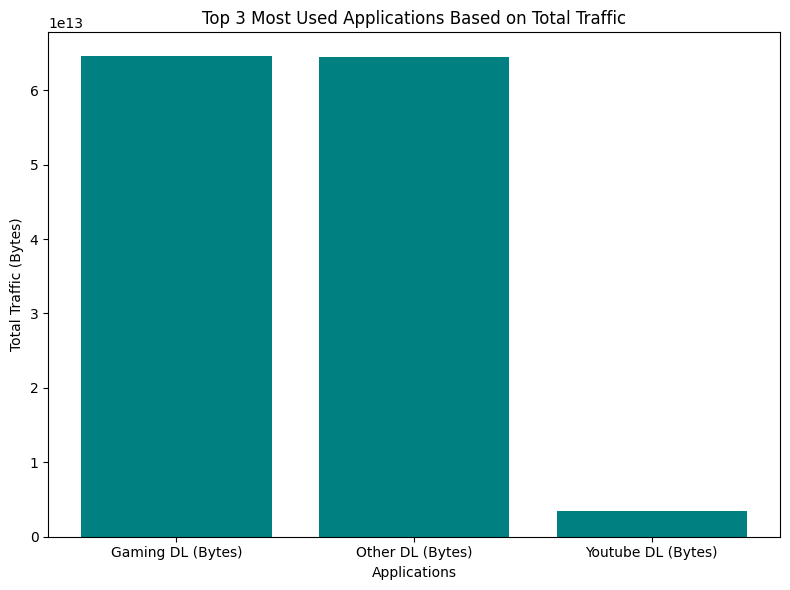

In [32]:
plt.figure(figsize=(8, 6))
plt.bar(top_3_apps_names, top_3_apps_values, color='teal')

# Add labels and title
plt.xlabel('Applications')
plt.ylabel('Total Traffic (Bytes)')
plt.title('Top 3 Most Used Applications Based on Total Traffic')

# Show plot
plt.tight_layout()
plt.show()

In [33]:
engagement_metrics = [
    'session_frequency',
    'total_duration_ms',
    'total_traffic'
]


In [34]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(customer_metrics[engagement_metrics])

In [35]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

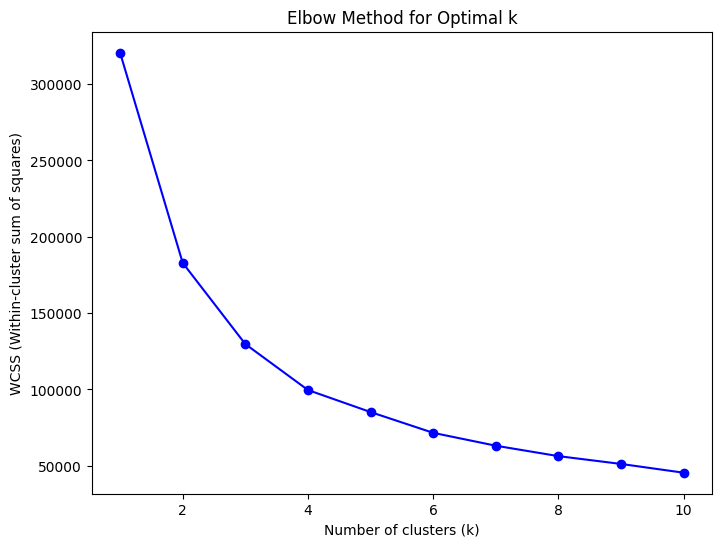

In [36]:

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Within-cluster sum of squares)')
plt.show()